# Analisis basico de resumen de casos corona virus Guatemala 2020

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
dir_resumen = '../data/resumen_casos.csv'
casos = pd.read_csv(dir_resumen, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha"]
for col in cols_fecha:
    casos[col] = pd.to_datetime(casos[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(casos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        37 non-null     datetime64[ns]
 1   confirmados  37 non-null     int64         
 2   recuperados  37 non-null     int64         
 3   fallecidos   37 non-null     int64         
 4   fuente       2 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.6+ KB
None


In [59]:
casos = casos.set_index(keys = "fecha", drop = True)
casos = casos.drop(columns = 'fuente') # ignorar fuente de informacion
# mostrar algunos datos
print(casos.head())

            confirmados  recuperados  fallecidos
fecha                                           
2020-03-01            0            0           0
2020-03-02            0            0           0
2020-03-03            0            0           0
2020-03-04            0            0           0
2020-03-05            0            0           0


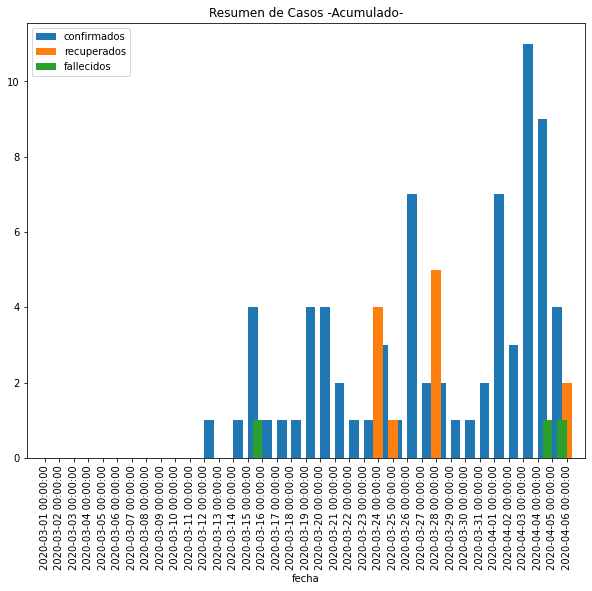

In [60]:
fig1 = plt.figure(figsize=(10,8))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Resumen de Casos -Acumulado-')
casos.plot.bar(ax = fig1ax1 , width = 2)

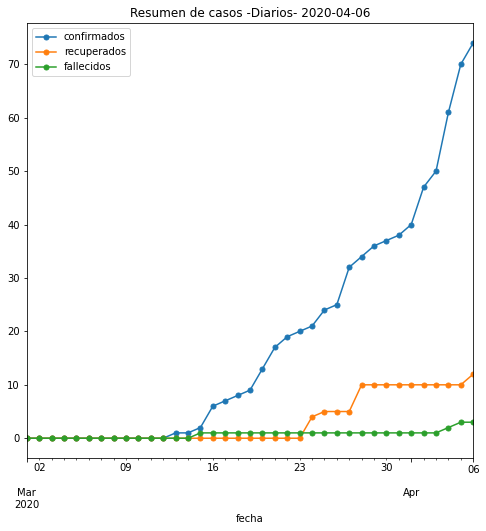

In [66]:
fig2 = plt.figure(figsize=(8,8))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Resumen de casos -Diarios- {}'.format(casos.index.to_list()[-1].strftime('%Y-%m-%d')))
casos.cumsum().plot( ax = fig2ax1, marker='.',markersize=10)
fig2.savefig("../imgs/resumen.png".format())